In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

In [ ]:
# parameters
y3 = 110
y1 = 110
gamma = 0.95
beta = 0.9
R = 1
y_bar = 500
y_underline = 100

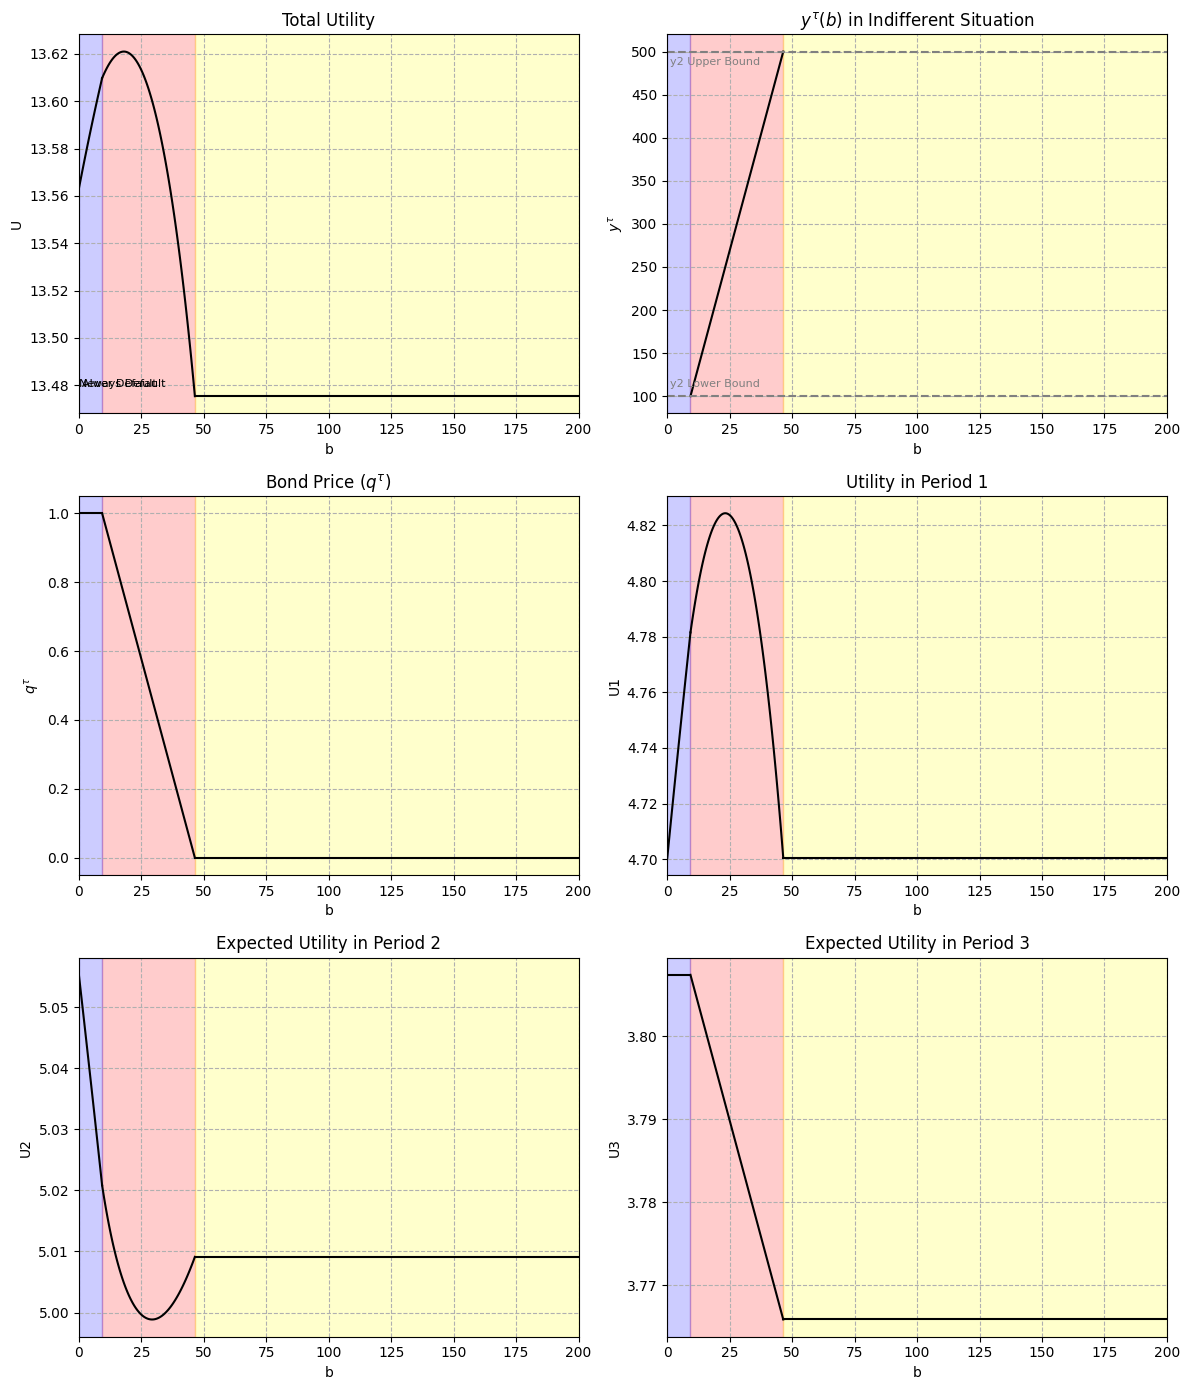

In [ ]:
psi = np.log(y3) - np.log(gamma * y3)
b_bar = (1 - gamma * np.exp(- beta * psi)) * y_bar
b_underline = (1 - gamma * np.exp(- beta * psi)) * y_underline

# Generate array of b values within the range [0, 0.1]
num_points = 100
b_values_case_1 = np.linspace(b_underline, b_bar, num_points)
b_values_case_2 = np.linspace(0, b_underline, num_points)
b_values_case_3 = np.linspace(b_bar, 200, num_points)

# Initialize arrays to store u, q_tau, and term1 values for each b
u_values_case_1 = np.zeros(num_points)
u_values_case_2 = np.zeros(num_points)
u_values_case_3 = np.zeros(num_points)
q_values_case_1 = np.zeros(num_points)
q_values_case_2 = np.zeros(num_points)
q_values_case_3 = np.zeros(num_points)
term1_values_case_1 = np.zeros(num_points)
term1_values_case_2 = np.zeros(num_points)
term1_values_case_3 = np.zeros(num_points)
term2_term4_values_case_1 = np.zeros(num_points)
term2_term4_values_case_2 = np.zeros(num_points)
term2_term4_values_case_3 = np.zeros(num_points)
term3_term5_values_case_1 = np.zeros(num_points)
term3_term5_values_case_2 = np.zeros(num_points)
term3_term5_values_case_3 = np.zeros(num_points)
y_tau_values = np.zeros(num_points)

# Calculate values for each case
for i, b in enumerate(b_values_case_1):
    y_tau = b / (1 - gamma * np.exp(-beta * psi))
    y_tau_values[i] = y_tau
    q_tau = (1 / R) * (y_bar - y_tau) / (y_bar - y_underline)
    q_values_case_1[i] = q_tau
    term1_values_case_1[i] = np.log(y1 + q_tau * b)
    term2 = (beta / (y_bar - y_underline)) * ((y_bar - b) * np.log(y_bar - b) - (y_tau - b) * np.log(y_tau - b) - (y_bar - y_tau))
    term3 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(y3) * (y_bar - y_tau)
    term4 = (beta / (y_bar - y_underline)) * (
                y_tau * np.log(gamma * y_tau) - y_underline * np.log(gamma * y_underline) - (y_tau - y_underline))
    term5 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(gamma *y3) * (y_tau - y_underline)
    term2_term4_values_case_1[i] = term2 + term4
    term3_term5_values_case_1[i] = term3 + term5
    u_values_case_1[i] = term1_values_case_1[i] + term2 + term3 + term4 + term5

for i, b in enumerate(b_values_case_2):
    q_tau = (1 / R)
    q_values_case_2[i] = q_tau
    term1_values_case_2[i] = np.log(y1 + q_tau * b)
    term2 = (beta / (y_bar - y_underline)) * ((y_bar - b) * np.log(y_bar - b) - (y_underline - b) * np.log(
        y_underline - b) - (y_bar - y_underline))
    term3 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(y3) * (y_bar - y_underline)
    term4 = 0
    term5 = 0
    term2_term4_values_case_2[i] = term2 + term4
    term3_term5_values_case_2[i] = term3 + term5
    u_values_case_2[i] = term1_values_case_2[i] + term2 + term3

for i, b in enumerate(b_values_case_3):
    q_values_case_3[i] = 0
    term1_values_case_3[i] = np.log(y1)
    term2 = 0
    term3 = 0
    term4 = (beta / (y_bar - y_underline)) * (
                y_bar * np.log(gamma * y_bar) - y_underline * np.log(gamma * y_underline) - (y_bar - y_underline))
    term5 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(gamma * y3) * (y_bar - y_underline)
    term2_term4_values_case_3[i] = term2 + term4
    term3_term5_values_case_3[i] = term3 + term5
    u_values_case_3[i] = term1_values_case_3[i] + term4 + term5

plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
plt.plot(b_values_case_1, u_values_case_1, label='Case 1', color='black')
plt.plot(b_values_case_2, u_values_case_2, label='Case 2', color='black')
plt.plot(b_values_case_3, u_values_case_3, label='Case 3', color='black')
plt.xlabel('b')
plt.ylabel('U')
plt.title('Total Utility')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)
plt.text(0.03, plt.ylim()[0] + 0.07 * (plt.ylim()[1] - plt.ylim()[0]), 'Never Default', color='black', fontsize=8)
plt.text(1.23, plt.ylim()[0] + 0.07 * (plt.ylim()[1] - plt.ylim()[0]), 'Always Default', color='black', fontsize=8)


plt.subplot(3, 2, 2)
plt.plot(b_values_case_1, y_tau_values, label='Case 1', color='black')
plt.xlabel('b')
plt.ylabel('$y^{\\tau}$')
plt.title('$y^{\\tau}(b)$ in Indifferent Situation')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)
plt.axhline(y_bar, color='gray', linestyle='--')
plt.axhline(y_underline, color='gray', linestyle='--')
plt.text(1.22, plt.ylim()[0] + 0.07 * (plt.ylim()[1] - plt.ylim()[0]), 'y2 Lower Bound', color='gray', fontsize=8)
plt.text(1.22, plt.ylim()[0] + 0.92 * (plt.ylim()[1] - plt.ylim()[0]), 'y2 Upper Bound', color='gray', fontsize=8)


plt.subplot(3, 2, 3)
plt.plot(b_values_case_1, q_values_case_1, label='Case 1', color='black')
plt.plot(b_values_case_2, q_values_case_2, label='Case 2', color='black')
plt.plot(b_values_case_3, q_values_case_3, label='Case 3', color='black')
plt.xlabel('b')
plt.ylabel('$q^{\\tau}$')
plt.title('Bond Price ($q^{\\tau}$)')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)


plt.subplot(3, 2, 4)
plt.plot(b_values_case_1, term1_values_case_1, label='Case 1', color='black')
plt.plot(b_values_case_2, term1_values_case_2, label='Case 2', color='black')
plt.plot(b_values_case_3, term1_values_case_3, label='Case 3', color='black')
plt.xlabel('b')
plt.ylabel('U1')
plt.title('Utility in Period 1')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)

plt.subplot(3, 2, 5)
plt.plot(b_values_case_1, term2_term4_values_case_1, label='Case 1', color='black')
plt.plot(b_values_case_2, term2_term4_values_case_2, label='Case 2', color='black')
plt.plot(b_values_case_3, term2_term4_values_case_3, label='Case 3', color='black')
plt.xlabel('b')
plt.ylabel('U2')
plt.title('Expected Utility in Period 2')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)

plt.subplot(3, 2, 6)
plt.plot(b_values_case_1, term3_term5_values_case_1, label='Case 1', color='black')
plt.plot(b_values_case_2, term3_term5_values_case_2, label='Case 2', color='black')
plt.plot(b_values_case_3, term3_term5_values_case_3, label='Case 3', color='black')
plt.xlabel('b')
plt.ylabel('U3')
plt.title('Expected Utility in Period 3')
plt.grid(True, linestyle='--')
plt.xlim(0, 200)
plt.axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
plt.axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
plt.axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)

plt.tight_layout()
#plt.savefig('case2.png', dpi=300, bbox_inches='tight')
plt.show()
#files.download('case2.png')


In [ ]:
y1 = 1.1
gamma = 0.8
beta = 0.9
R = 1
y_bar = 1.3
y_underline = 1
y3 = 1.3

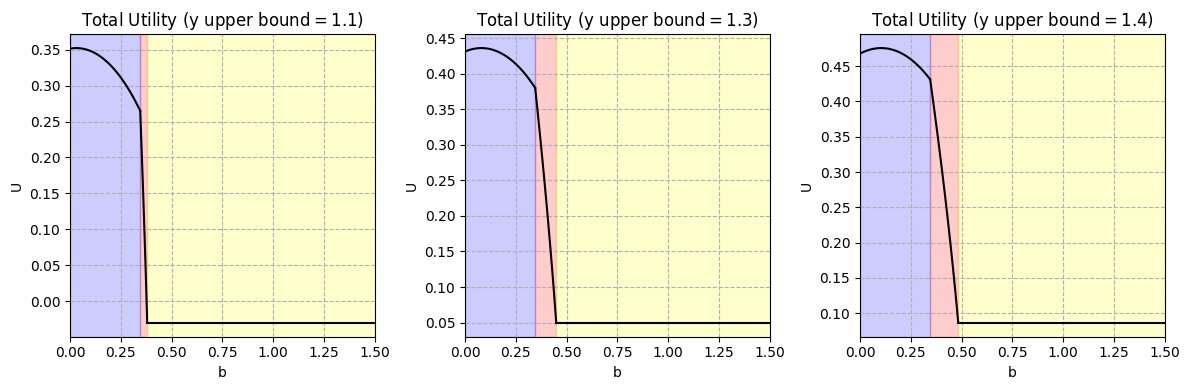

In [ ]:
def calculate_utility(y_bar):
    psi = np.log(y3) - np.log(gamma * y3)
    b_bar = (1 - gamma * np.exp(- beta * psi)) * y_bar
    b_underline = (1 - gamma * np.exp(- beta * psi)) * y_underline

    # Generate array of b values within the range [0, 0.1]
    num_points = 100
    b_values_case_1 = np.linspace(b_underline, b_bar, num_points)
    b_values_case_2 = np.linspace(0, b_underline, num_points)
    b_values_case_3 = np.linspace(b_bar, 2, num_points)

    # Initialize arrays to store u values for each case
    u_values_case_1 = np.zeros(num_points)
    u_values_case_2 = np.zeros(num_points)
    u_values_case_3 = np.zeros(num_points)

    # Calculate values for each case
    for i, b in enumerate(b_values_case_1):
        y_tau = b / (1 - gamma * np.exp(-beta * psi))
        q_tau = (1 / R) * (y_bar - y_tau) / (y_bar - y_underline)
        term1 = np.log(y1 + q_tau * b)
        term2 = (beta / (y_bar - y_underline)) * ((y_bar - b) * np.log(y_bar - b) - (y_tau - b) * np.log(y_tau - b) - (y_bar - y_tau))
        term3 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(y3) * (y_bar - y_tau)
        term4 = (beta / (y_bar - y_underline)) * (
                    y_tau * np.log(gamma * y_tau) - y_underline * np.log(gamma * y_underline) - (y_tau - y_underline))
        term5 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(gamma *y3) * (y_tau - y_underline)
        u_values_case_1[i] = term1 + term2 + term3 + term4 + term5

    for i, b in enumerate(b_values_case_2):
        q_tau = (1 / R)
        term1 = np.log(y1 + q_tau * b)
        term2 = (beta / (y_bar - y_underline)) * ((y_bar - b) * np.log(y_bar - b) - (y_underline - b) * np.log(
            y_underline - b) - (y_bar - y_underline))
        term3 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(y3) * (y_bar - y_underline)
        u_values_case_2[i] = term1 + term2 + term3

    for i, b in enumerate(b_values_case_3):
        term1 = np.log(y1)
        term4 = (beta / (y_bar - y_underline)) * (
                y_bar * np.log(gamma * y_bar) - y_underline * np.log(gamma * y_underline) - (y_bar - y_underline))
        term5 = ((beta) ** 2 / (y_bar - y_underline)) * np.log(gamma * y3) * (y_bar - y_underline)
        u_values_case_3[i] = term1 + term4 + term5

    return b_values_case_1, u_values_case_1, b_values_case_2, u_values_case_2, b_values_case_3, u_values_case_3

# Plotting
y3_values = [1.1, 1.3, 1.4]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, y3_value in enumerate(y3_values):
    b_values_case_1, u_values_case_1, b_values_case_2, u_values_case_2, b_values_case_3, u_values_case_3 = calculate_utility(y3_value)

    axes[i].plot(b_values_case_1, u_values_case_1, label='Case 1', color='black')
    axes[i].plot(b_values_case_2, u_values_case_2, label='Case 2', color='black')
    axes[i].plot(b_values_case_3, u_values_case_3, label='Case 3', color='black')
    axes[i].set_xlabel('b')
    axes[i].set_ylabel('U')
    axes[i].set_title(f'Total Utility (y upper bound$= {y3_value}$)')
    axes[i].grid(True, linestyle='--')
    axes[i].set_xlim(0, 1.5)
    axes[i].axvspan(min(b_values_case_1), max(b_values_case_1), color='red', alpha=0.2)
    axes[i].axvspan(min(b_values_case_2), max(b_values_case_2), color='blue', alpha=0.2)
    axes[i].axvspan(min(b_values_case_3), max(b_values_case_3), color='yellow', alpha=0.2)


plt.tight_layout()
#plt.savefig('y_bar.png', dpi=300, bbox_inches='tight')
plt.show()
#files.download('y_bar.png')